## Problem Set #3
MACS 30200, Dr. Evans and Dr. Soltoff

Shuting Chen

### Part 2. Scalar regression 

In [1]:
from keras.datasets import boston_housing
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

/Users/ivychen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Normalizing the data 
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#### Model 1.  Fully-connected, epoches = 25

In [3]:
from keras import models
from keras import layers

def first_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [4]:
import numpy as np

# Epochs = 25
k = 10
num_val_samples = len(train_data) // k
num_epochs = 25
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = first_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


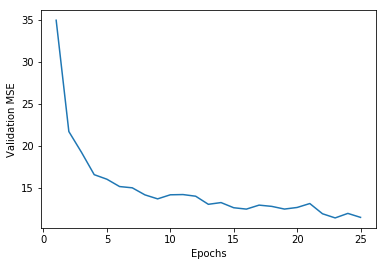

In [5]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label = 'MSE: Model 1')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [6]:
min(average_mse_history)

11.422463181515194

#### Model 2.  Fully-connected, epoches = 100

In [7]:
# Epochs = 100
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = first_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


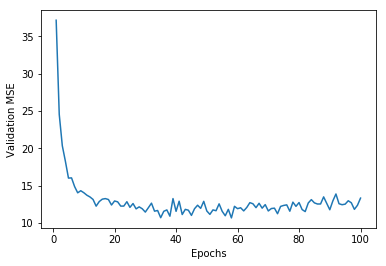

In [8]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label = 'MSE: Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [9]:
min(average_mse_history)

10.673023708664086

#### Model 3. Dropout 

In [10]:
def third_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [11]:
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = third_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


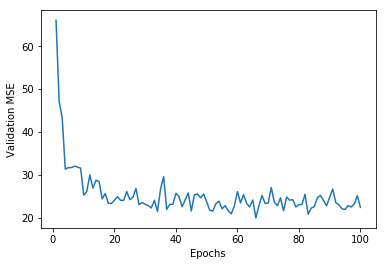

In [12]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label = 'MSE: Model 3')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [13]:
min(average_mse_history)

19.957391580669757

#### Model 4.  L1 weight regularization with penalty of 0.001

In [14]:
def fourth_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1, kernel_regularizer=regularizers.l1(0.001)))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [15]:
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = fourth_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


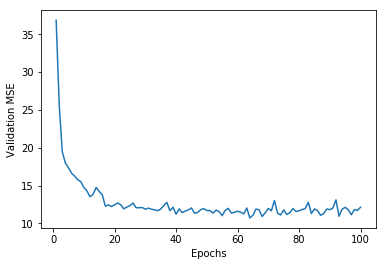

In [16]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label = 'MSE: Model 4')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [17]:
min(average_mse_history)

10.715233157500624

#### Model 5.  L2 weight regularization with penalty of 0.001

In [18]:
def fifth_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.001)))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [19]:
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = fifth_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


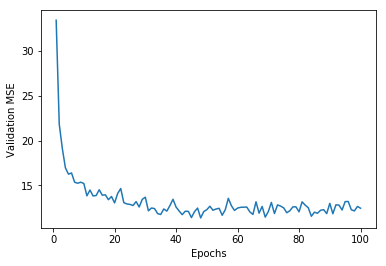

In [20]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label = 'MSE: Model 5')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [21]:
min(average_mse_history)

11.38408665481955

It can be seen that the second model (fully-connected, epochs = 100) has the optimal performance. 

In [23]:
model = first_model()
history = model.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

Epoch 1/100
404/404 [==============================] - 1s 4ms/step - loss: 171.1287
Epoch 2/100
404/404 [==============================] - 0s 1ms/step - loss: 23.3866
Epoch 3/100
404/404 [==============================] - 0s 1ms/step - loss: 17.8004
Epoch 4/100
404/404 [==============================] - 0s 1ms/step - loss: 15.0257
Epoch 5/100
404/404 [==============================] - 0s 1ms/step - loss: 13.6292
Epoch 6/100
404/404 [==============================] - 0s 1ms/step - loss: 12.4995
Epoch 7/100
404/404 [==============================] - 0s 1ms/step - loss: 11.8423
Epoch 8/100
404/404 [==============================] - 0s 1ms/step - loss: 10.6818
Epoch 9/100
404/404 [==============================] - 1s 1ms/step - loss: 11.3003
Epoch 10/100
404/404 [==============================] - 0s 1ms/step - loss: 10.4711
Epoch 11/100
404/404 [==============================] - 0s 1ms/step - loss: 10.1515
Epoch 12/100
404/404 [==============================] - 0s 1ms/step - loss: 9.4011
E

In [24]:
test_mse_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 4ms/step


In [25]:
test_mse_score

17.17854279162837